### One Hot encoding

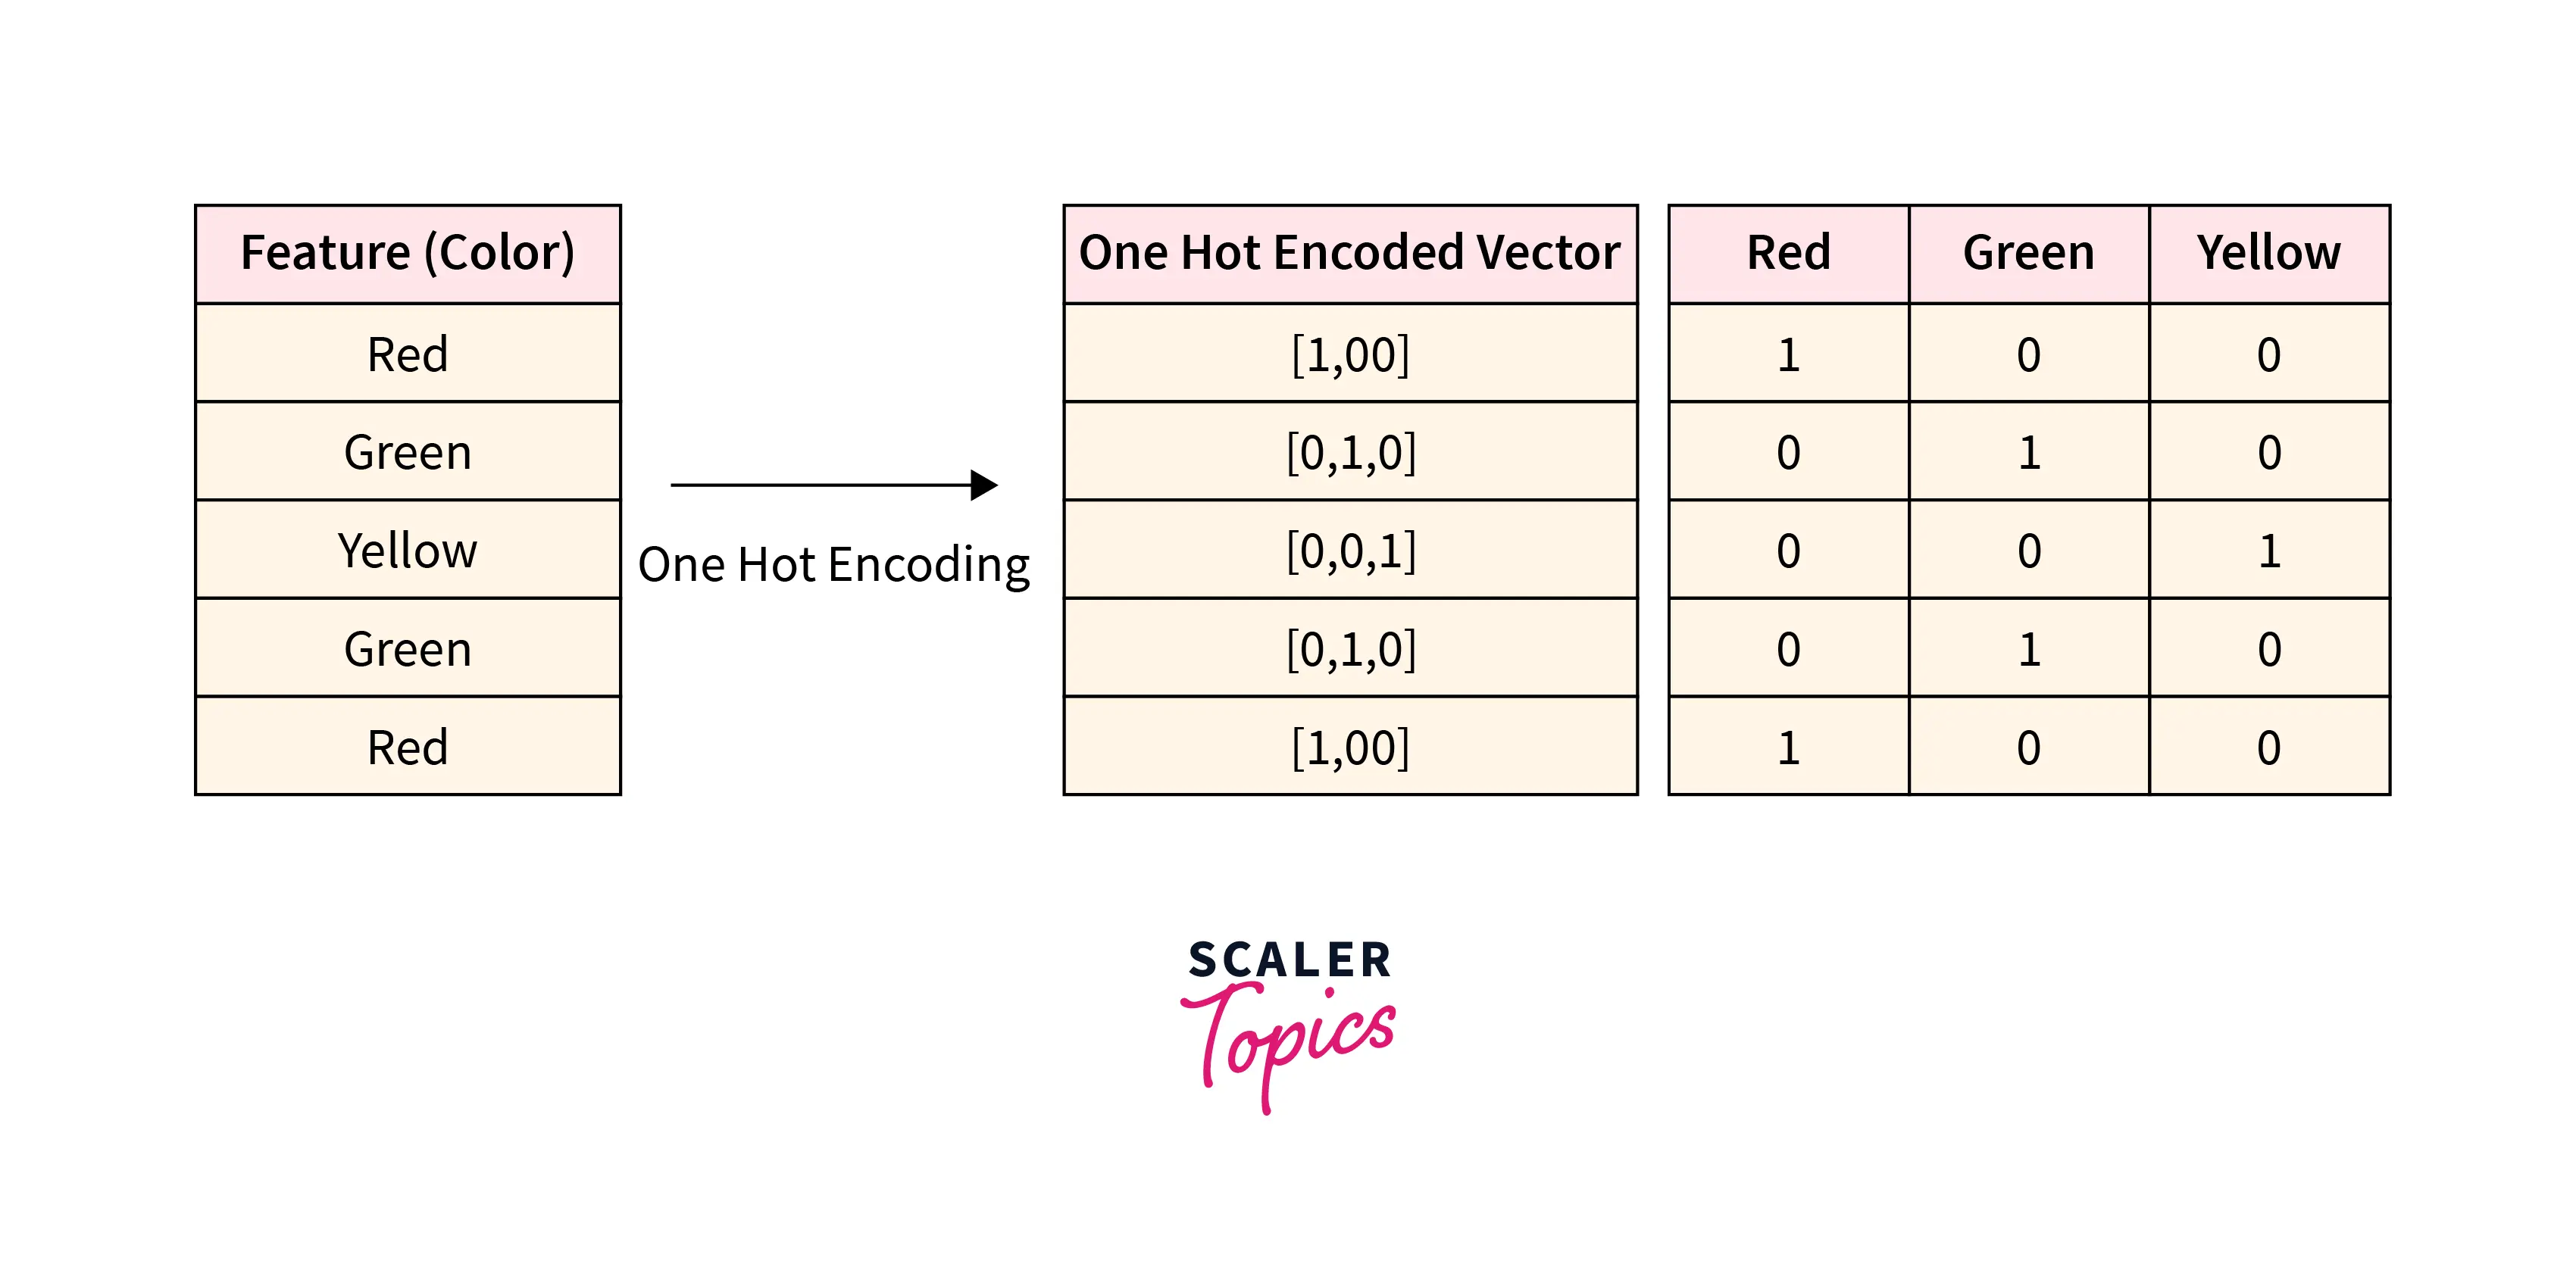

In [1]:
"""
One Hot Encoding -- 
We cant just assign 0, 1, and 2 to red, green, yellow, bcoz the py will think yellow is more imp than red, coz its assigned a higher number(2) than red(1).

In that case we use one hot encoding, as we can see in the above image. Hence the entire color coding is stored in a vector.

Multicollinearity -- 

When two or more independent (feature) variables in a dataset are highly correlated,
they carry redundant information. This makes it hard for models like linear or logistic
regression to determine the true effect of each feature on the target variable.
It can lead to unstable coefficients and inflated variance.




Why we keep (n-1) columns in One Hot Encoding ???

This is bcoz, we dont want any of our input data to be interrelated with another input data. 
If the datas are interrelated, then we will not be able to make good prediction.
Furthermore, input columns are meant to be independent, if they are dependent it will cause error.
As we can see in above img the basic corelation btwn the input columns is sum of all the cells in a row is 1, 
if we drop, column 'Red' then the problem will be solved. Also each color will have a new vector of numbers of their colors.

If we encode a categorical feature with 'n' unique categories into 'n' binary columns,
one column becomes redundant because it can be inferred from the others.
This causes perfect multicollinearity, known as the "dummy variable trap."
To avoid this, we drop one column — keeping only (n-1) columns ensures the data
remains informative without redundancy.

"""

'\nOne Hot Encoding -- \nWe cant just assign 0, 1, and 2 to red, green, yellow, bcoz the py will think yellow is more imp than red, coz its assigned a higher number(2) than red(1).\n\nIn that case we use one hot encoding, as we can see in the above image. Hence the entire color coding is stored in a vector.\n\nMulticollinearity -- \n\nWhen two or more independent (feature) variables in a dataset are highly correlated,\nthey carry redundant information. This makes it hard for models like linear or logistic\nregression to determine the true effect of each feature on the target variable.\nIt can lead to unstable coefficients and inflated variance.\n\n\n\n\nWhy we keep (n-1) columns in One Hot Encoding ???\n\nThis is bcoz, we dont want any of our input data to be interrelated with another input data. \nIf the datas are interrelated, then we will not be able to make good prediction.\nFurthermore, input columns are meant to be independent, if they are dependent it will cause error.\nAs we ca

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('cars.csv')
print(df.head(5))
print()
print(df.shape)
print() 

# printing the unique values in cols
for i in df.columns:
    print(f"UNIQUE VALUE IN {i} : {df[i].nunique()}")
print() 

# unique -- to print all the unique values
# nunique -- to print total numbers of unique values that a column holds
# from the data below now we get to know that we will be applying encoding to brand, fuel, and owner

# printing how many rows (data) each unique value in the data holds
print(f"{df['brand'].value_counts()}\n")
print(f"{df['fuel'].value_counts()}\n")
print(f"{df['owner'].value_counts()}\n")



     brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000

(8128, 5)

UNIQUE VALUE IN brand : 32
UNIQUE VALUE IN km_driven : 921
UNIQUE VALUE IN fuel : 4
UNIQUE VALUE IN owner : 5
UNIQUE VALUE IN selling_price : 677

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         

In [4]:
# one hot encoding using pandas

# using 'dummies'
pd.get_dummies(df, columns=['fuel', 'owner'])       # this here will go to fuel and owner column and make a separate column of each unique value that both the column holds 
# right now not encoding the 'brand', coz it will make a lot of columns
# now both the fuel and owner columns will be removed, instead the columns of each unique value will appear

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


In [5]:
# K-1 One Hot Encoding using pandas

# changing the boolean true false value into 0 and 1
pd.get_dummies(df, columns=['fuel', 'owner'], drop_first=True, dtype=int)       # here we have removed 'fuel_CNG', removing the n-1 column


""" 

When we drop one column in one-hot encoding (using k-1 encoding), it might seem like we are losing a feature, but in reality, no information is lost.

If a categorical variable has k unique categories, only k-1 columns are needed to represent it completely. The dropped column is logically inferable from the remaining ones.

For example, if the feature Color has categories Red, Blue, and Green, we can represent it with three binary columns. If we drop the Green column, any row where both Red and Blue are 0 automatically implies Green.

Thus, dropping one column does not remove any meaningful information — it only eliminates redundancy and prevents perfect multicollinearity, which occurs when one column can be exactly predicted from others.

"""

' \n\nWhen we drop one column in one-hot encoding (using k-1 encoding), it might seem like we are losing a feature, but in reality, no information is lost.\n\nIf a categorical variable has k unique categories, only k-1 columns are needed to represent it completely. The dropped column is logically inferable from the remaining ones.\n\nFor example, if the feature Color has categories Red, Blue, and Green, we can represent it with three binary columns. If we drop the Green column, any row where both Red and Blue are 0 automatically implies Green.\n\nThus, dropping one column does not remove any meaningful information — it only eliminates redundancy and prevents perfect multicollinearity, which occurs when one column can be exactly predicted from others.\n\n'

In [6]:
# One Hot Encoding using sklearn

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:4], df.iloc[:, -1], test_size=0.2, random_state=0)

# the issue with using One Hot Encoding is, when you use one hot encoding with some inputs, and with other inputs you use normalization encoding, in that case you have to use encoding separately with different columns. And after that you have merge those columns into a single dataframe, and then you can make prediction on the dataset

# to avoid this we use 'column transfermer'

# One Hot Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)

"""
dtype=np.int32          → Defines the data type of the encoded output. By default, it's float64. Using np.int32 stores the encoded values as integers (0s and 1s), saving memory and making the output more readable.

sparse_output=False     → By default, OneHotEncoder creates a sparse matrix (efficient for large data with many zeros). Setting sparse_output=False returns a dense NumPy array instead, which is easier to view and convert to a DataFrame.

When sparse_output=True, the encoder returns a sparse matrix instead of a dense NumPy array.
A sparse matrix stores only nonzero values and their positions, saving memory when most entries are zeros (which is typical in one-hot encoding).

Example:
If you have many categories, most encoded columns are 0 for each row.
A sparse matrix avoids physically storing all those zeros — it just records where the 1s are.
To view it like a regular array, you can convert it with:


"""


x_train_new = ohe.fit_transform(x_train[['fuel', 'owner']])
x_test_new = ohe.transform(x_test[['fuel', 'owner']])

# Combine back with numeric columns
x_train_final = np.hstack((x_train[['brand', 'km_driven']].values, x_train_new))
x_test_final = np.hstack((x_test[['brand', 'km_driven']].values, x_test_new))

x_train_final

array([['Hyundai', 60000, 0, ..., 0, 0, 0],
       ['Tata', 150000, 1, ..., 0, 0, 1],
       ['Hyundai', 110000, 1, ..., 1, 0, 0],
       ...,
       ['Hyundai', 90000, 0, ..., 1, 0, 0],
       ['Volkswagen', 90000, 1, ..., 0, 0, 0],
       ['Hyundai', 110000, 0, ..., 0, 0, 0]], dtype=object)

In [7]:
# One Hot Encoding with top categories

counts = df['brand'].value_counts()
counts

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [8]:
# those cars that hold less than 100 models, putting them in a single column

threshold = 100
change = counts[counts <= threshold].index
print(change)       # will print the cars which are below the threshold level of 100

pd.get_dummies(df['brand'].replace(change, 'others'))       # now we have placed all those cars that hold less than 100 models in the 'others' column

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Land', 'Force', 'Isuzu', 'Ambassador',
       'Kia', 'MG', 'Daewoo', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')


,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,others
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False
